<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Canopy-model-for-Radar-Backscattering" data-toc-modified-id="Canopy-model-for-Radar-Backscattering-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Canopy model for Radar Backscattering</a></span><ul class="toc-item"><li><span><a href="#Basic-Assumptions" data-toc-modified-id="Basic-Assumptions-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Basic Assumptions</a></span></li></ul></li><li><span><a href="#Further-Simplifications" data-toc-modified-id="Further-Simplifications-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Further Simplifications</a></span></li><li><span><a href="#Final-Parameters-for-Retrieval-Algorithm" data-toc-modified-id="Final-Parameters-for-Retrieval-Algorithm-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Final Parameters for Retrieval Algorithm</a></span></li><li><span><a href="#References" data-toc-modified-id="References-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>References</a></span></li><li><span><a href="#Project-Setup" data-toc-modified-id="Project-Setup-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Project Setup</a></span></li><li><span><a href="#Get-UAVSAR-data" data-toc-modified-id="Get-UAVSAR-data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Get UAVSAR data</a></span></li><li><span><a href="#Get-Lidar-data" data-toc-modified-id="Get-Lidar-data-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Get Lidar data</a></span></li><li><span><a href="#Biomass-retrieval-(100m)" data-toc-modified-id="Biomass-retrieval-(100m)-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Biomass retrieval (100m)</a></span><ul class="toc-item"><li><span><a href="#Biomass-retrieval-Model-1.-Universal-approach-(update-W-and-S-only)" data-toc-modified-id="Biomass-retrieval-Model-1.-Universal-approach-(update-W-and-S-only)-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Biomass retrieval Model 1. Universal approach (update W and S only)</a></span></li></ul></li></ul></div>

## Canopy model for Radar Backscattering


The physical based data-fitted model (Saatchi and McDonald, 1997) describes scattering mechanisms of the forest with three components **(Fig. 1)** , namely direct **D** , Interactive **I** , i.e., direct-reflect, and ground **G** components.  

The **D** component consists of the scattering from trunks, branches, and leaves directly back to the sensor.  The **I** terms, also known as "double bounce" term, is the scattering that includes interaction between trees and ground.  This includes the trunk-ground, crown-ground scattering.  The **G** component is the scattering directly back from ground attenuated by the forest canopy.

![Figure 1. Scattering mechanisms of forest scattering model](fig1.png)

The model can be written in the form of the following equation,

$$
\begin{align}
\sigma_0(p,s,t) & = A_{p,t} W_s^{\alpha_p} (1 - \exp(-B_{p,t} W_s^{\beta_p})) \quad\quad\quad & [D: Volume] \\
               & + C_{p,t} W_s^{\gamma_p} \Gamma_{p,t} \exp(-B_{p,t} W_s^{\beta_p})  \quad\quad\quad & [I: Volume-Surface] \\
               & + S_{p,t} \exp(-B_{p,t} W_s^{\beta_p})  \quad\quad\quad & [G: Surface]
\end{align}
$$

where the subscripts $p, s, t$ represents the variations over $polarization, space, time$.

### Basic Assumptions

The simplified assumptions here include:

(1) Parameters $A_{p,t}, B_{p,t}, C_{p,t}$ change over time and different polarizations, but vary little spatially within a local window.

(2) Parameters $\alpha_{p}, \beta_{p}, \gamma_{p}$ change with different polarizations, but vary little temporally, or spatially within a local window.

(3) Parameters $\Gamma_{p,t}, S_{p,t}$, related to both surface roughness and dielectric properties, change over time and different polarizations, but vary little spatially within a local window.




## Further Simplifications

We rewrite the original equation as

$$
\begin{align}
\sigma_0(p,s,t) & = A_{p,t} W_s^{\alpha_p} (1 - \exp(-B_{p,t} W_s^{\beta_p})) \quad\quad\quad & [D] \\
               & + C_{p,t} W_s^{\gamma_p} \Gamma_{p,t} \exp(-B_{p,t} W_s^{\beta_p})  \quad\quad\quad & [I] \\
               & + S_{p,t} \exp(-B_{p,t} W_s^{\beta_p})  \quad\quad\quad & [G] \\
\Rightarrow \quad\quad\quad \quad\quad\quad  & \\
\sigma_0(p,s,t) & = A_{p,t} W_s^{\alpha_p} (1 - \exp(-B_{p,t} W_s)) \quad\quad\quad & [D] \\
               & + C'_{p,t} S_{t} W_s^{\gamma_p} \exp(-B_{p,t} W_s)  \quad\quad\quad & [I] \\
               & + D_{p} S_{t} \exp(-B_{p,t} W_s) \quad\quad\quad & [G]
\end{align}
$$

where we have 

**Assumption 1:**

$$
\begin{align}
\beta_p & = 1
\end{align}
$$

This assumption is consistent with the estimation of forward model simulations.

**Assumption 2:**

$S$ term (backscattering crosssection from soil rough surface, no dependency on vegetation) is separated into polarization-dependent term and time-dependent term,

$$
\begin{align}
S_{p,t} & = D_{p} S_{t}
\end{align}
$$


**Assumption 3:**

$C\Gamma$ term (reflectivity of the soil rough surface, and no dependency on vegetation) is rewritten as the new constant $C'$ with time-dependent $S_t$,

$$
\begin{align}
C_{p,t} \Gamma_{p,t} & = C_{p,t} K_{p} S_{t} \\
                     & = C'_{p,t} S_{t} 
\end{align}
$$




## Final Parameters for Retrieval Algorithm

Based on the above simplications, we have the following list of unknown parameters to solve:

$$ A_{p,t}, B_{p,t}, C'_{p,t}, D_{p}, \alpha_p, \gamma_p, S_t, W_s $$

For possible solutions, we need to satisfy the following condition,

$$ 3pt + 3p + t + s < pts $$ 

For example, a 2-polarization system of 3x3-window retrieval needs at least 2 multi-temporal observations to satisfy the condition above.

## References

_Saatchi, S.S., McDonald, K.C., 1997. Coherent effects in microwave backscattering models for forest canopies. IEEE Transactions on Geoscience and Remote Sensing 35, 1032–1044. https://doi.org/10.1109/36.602545_

_Oh, Y., Sarabandi, K., Ulaby, F.T., 1992. An empirical model and an inversion technique for radar scattering from bare soil surfaces. IEEE Transactions on Geoscience and Remote Sensing 30, 370–381. https://doi.org/10.1109/36.134086_




## Project Setup

Install required packages and set up the environment.

In [ ]:
# !pip3 install ipywidgets
# !pip3 install plotly
# !pip3 install matplotlib
# !pip3 install pandas
# !pip3 install gdal
# !pip3 install dask
# !pip3 install xarray
# !pip3 install zarr
# !pip3 install h5py
# !pip3 install rasterio
# !pip3 install scikit-learn
# !pip3 install georasters
# !pip3 install learn2map
# !pip3 install oocprocess


In [1]:
import os
import subprocess
import georasters as gr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns         
import statsmodels.api as sm
import statsmodels.stats.api as sms
import wget
import xarray as xr
import learn2map.raster_tools as rt
from statsmodels.compat import lzip
from statsmodels.formula.api import ols

import model_radar as mr
import uavsar_rtc as uav

import warnings; warnings.simplefilter('ignore')

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 7)

/home/xeno/anaconda3/envs/jpl/lib/python3.6/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


## Get UAVSAR data

* Download all available data at the TALL site from the NISAR AMPM Campaign simulated product

* Organize the list of scenes with latest version

* Convert HH/HV backscatter data to RTC and save as Geotiff

* Original code from Dr. Josef Kellndorfer.


In [2]:
workingdir='/media/xeno/SAR/JPL/Forest_Scattering_Model/NISAR_Biomass/Data/leno'
os.chdir(workingdir)

In [3]:
#get UAVSAR data
cmd = "python3 algorithm/seppo_uavsar_download.py -v -r -i rs_data/uavsar/index.html --site 03112 --campaign NISARP -ldt > rs_data/uavsar/datatakes_leno UAVSAR"
import os
os.system(cmd)

256

In [4]:
# get product ids
product_ids = uav.get_product_ids("rs_data/uavsar/datatakes_leno")

{'NISARP_03112_19040_002_190621_L090_CX': ['02'], 'NISARP_03112_19044_009_190703_L090_CX': ['01', '02'], 'NISARP_03112_19049_003_190717_L090_CX': ['01', '02', '03'], 'NISARP_03112_19052_002_190726_L090_CX': ['01', '02', '03'], 'NISARP_03112_19054_002_190813_L090_CX': ['01', '02', '03'], 'NISARP_03112_19071_002_191001_L090_CX': ['01', '02', '03'], 'NISARP_03112_19078_002_191015_L090_CX': ['01'], 'NISARP_03112_22004_004_220422_L090_CX': ['01', '02'], 'NISARP_03112_22011_001_220508_L090_CX': ['01', '02']}
NISARP_03112_19040_002_190621_L090_CX_02
NISARP_03112_19044_009_190703_L090_CX_02
NISARP_03112_19049_003_190717_L090_CX_03
NISARP_03112_19052_002_190726_L090_CX_03
NISARP_03112_19054_002_190813_L090_CX_03
NISARP_03112_19071_002_191001_L090_CX_03
NISARP_03112_19078_002_191015_L090_CX_01
NISARP_03112_22004_004_220422_L090_CX_02
NISARP_03112_22011_001_220508_L090_CX_02


In [5]:
# get download urls - no dithering
DOWNLOADROOT='https://downloaduav.jpl.nasa.gov/Release2v/'
dl = uav.get_download_links(product_ids, DOWNLOADROOT)

In [6]:
#change the working diretory to uavasar folder
workingdir='rs_data/uavsar'
os.makedirs(workingdir,exist_ok='True')
os.chdir(workingdir)

In [7]:
#donwload the UAVSAR dataset
failed=[]
for dt in dl:
    for i in dl[dt]:
        try:
#             print(f'\n{dl[dt][i]}')
            wget.download(dl[dt][i])
        except:
            failed.append(dl[dt][i])
            print('cannot  download',dl[dt][i])
failed

cannot  download https://downloaduav.jpl.nasa.gov/Release2v/NISARP_03112_19040_002_190621_L090_CX_02/NISARP_03112_19040_002_190621_L090_CX_129A_02.ann
cannot  download https://downloaduav.jpl.nasa.gov/Release2v/NISARP_03112_19040_002_190621_L090_CX_02/NISARP_03112_19040_002_190621_L090_CX_129A_02.rtc
cannot  download https://downloaduav.jpl.nasa.gov/Release2v/NISARP_03112_19040_002_190621_L090_CX_02/NISARP_03112_19040_002_190621_L090_CX_129A_02.inc
cannot  download https://downloaduav.jpl.nasa.gov/Release2v/NISARP_03112_19040_002_190621_L090_CX_02/NISARP_03112_19040_002_190621_L090_CX_129A_02.flat.inc
cannot  download https://downloaduav.jpl.nasa.gov/Release2v/NISARP_03112_19040_002_190621_L090_CX_02/NISARP_03112_19040_002_190621_L090HHHH_CX_129A_02.grd
cannot  download https://downloaduav.jpl.nasa.gov/Release2v/NISARP_03112_19040_002_190621_L090_CX_02/NISARP_03112_19040_002_190621_L090HVHV_CX_129A_02.grd
cannot  download https://downloaduav.jpl.nasa.gov/Release2v/NISARP_03112_19078_00

['https://downloaduav.jpl.nasa.gov/Release2v/NISARP_03112_19040_002_190621_L090_CX_02/NISARP_03112_19040_002_190621_L090_CX_129A_02.ann',
 'https://downloaduav.jpl.nasa.gov/Release2v/NISARP_03112_19040_002_190621_L090_CX_02/NISARP_03112_19040_002_190621_L090_CX_129A_02.rtc',
 'https://downloaduav.jpl.nasa.gov/Release2v/NISARP_03112_19040_002_190621_L090_CX_02/NISARP_03112_19040_002_190621_L090_CX_129A_02.inc',
 'https://downloaduav.jpl.nasa.gov/Release2v/NISARP_03112_19040_002_190621_L090_CX_02/NISARP_03112_19040_002_190621_L090_CX_129A_02.flat.inc',
 'https://downloaduav.jpl.nasa.gov/Release2v/NISARP_03112_19040_002_190621_L090_CX_02/NISARP_03112_19040_002_190621_L090HHHH_CX_129A_02.grd',
 'https://downloaduav.jpl.nasa.gov/Release2v/NISARP_03112_19040_002_190621_L090_CX_02/NISARP_03112_19040_002_190621_L090HVHV_CX_129A_02.grd',
 'https://downloaduav.jpl.nasa.gov/Release2v/NISARP_03112_19078_002_191015_L090_CX_01/NISARP_03112_19078_002_191015_L090_CX_129A_01.ann',
 'https://downloaduav

In [8]:
#remove the failed dataset
for failed_link in failed:
    failed_product_id = failed_link.split('/')[-2]
    if failed_product_id in product_ids:
        product_ids.remove(failed_product_id)
    
product_ids

['NISARP_03112_19044_009_190703_L090_CX_02',
 'NISARP_03112_19049_003_190717_L090_CX_03',
 'NISARP_03112_19052_002_190726_L090_CX_03',
 'NISARP_03112_19054_002_190813_L090_CX_03',
 'NISARP_03112_19071_002_191001_L090_CX_03']

In [9]:
#convert to geotiff
sar_list = []
for i in product_ids:
#     hh,hv = uav.grd2tif0(i,dl,True)
    hh,hv = uav.grd2tif(i,dl,True)
    sar_list.append(hv)
    sar_list.append(hh)

Wrote NISARP_03112_19044_009_190703_L090HHHH_CX_129A_02.tif
Wrote NISARP_03112_19044_009_190703_L090HVHV_CX_129A_02.tif
Wrote NISARP_03112_19049_003_190717_L090HHHH_CX_129A_03.tif
Wrote NISARP_03112_19049_003_190717_L090HVHV_CX_129A_03.tif
Wrote NISARP_03112_19052_002_190726_L090HHHH_CX_129A_03.tif
Wrote NISARP_03112_19052_002_190726_L090HVHV_CX_129A_03.tif
Wrote NISARP_03112_19054_002_190813_L090HHHH_CX_129A_03.tif
Wrote NISARP_03112_19054_002_190813_L090HVHV_CX_129A_03.tif
Wrote NISARP_03112_19071_002_191001_L090HHHH_CX_129A_03.tif
Wrote NISARP_03112_19071_002_191001_L090HVHV_CX_129A_03.tif


In [10]:
#save the geotiff to a csv file
df = pd.Series(data=sar_list, name="file_name")
df.to_csv("sar_list_leno.csv", index=False)


**Resample the data to 100m resolution**


In [11]:
#create a reference file using gdal
sar_list = pd.read_csv("sar_list_leno.csv")['file_name'].tolist()
in_file = sar_list[-1]
ref_file = "NISARP_03112_100mref.tif"
gdal_expression = f'gdal_translate -tr 0.001 0.001 -r average {in_file} {ref_file}'
print(gdal_expression)
subprocess.check_output(gdal_expression, shell=True)

gdal_translate -tr 0.001 0.001 -r average NISARP_03112_19071_002_191001_L090HHHH_CX_129A_03.tif NISARP_03112_100mref.tif


b'Input file size is 5797, 6468\n0...10...20...30...40...50...60...70...80...90...100 - done.\n'

In [12]:
#aggregate the uavsar file
sar_list = pd.read_csv("sar_list_leno.csv")['file_name'].tolist()
sar_reg_list = []
for in_file in sar_list:
    out_file = in_file.replace(".tif", "_100m.tif")
    rt.raster_clip(ref_file, in_file, out_file, resampling_method="average")
    sar_reg_list.append(out_file)

gdalwarp -s_srs "+proj=longlat +datum=WGS84 +no_defs" -t_srs "+proj=longlat +datum=WGS84 +no_defs" -te -88.47125 31.589650000000006 -87.89125 32.236650000000004 -ts 580 647 -srcnodata nan -dstnodata nan -overwrite -multi -co COMPRESS=DEFLATE -co ZLEVEL=1 -co PREDICTOR=2 -co BIGTIFF=YES -r average -ot Float32 "NISARP_03112_19044_009_190703_L090HVHV_CX_129A_02.tif" "NISARP_03112_19044_009_190703_L090HVHV_CX_129A_02_100m.tif"
gdalwarp -s_srs "+proj=longlat +datum=WGS84 +no_defs" -t_srs "+proj=longlat +datum=WGS84 +no_defs" -te -88.47125 31.589650000000006 -87.89125 32.236650000000004 -ts 580 647 -srcnodata nan -dstnodata nan -overwrite -multi -co COMPRESS=DEFLATE -co ZLEVEL=1 -co PREDICTOR=2 -co BIGTIFF=YES -r average -ot Float32 "NISARP_03112_19044_009_190703_L090HHHH_CX_129A_02.tif" "NISARP_03112_19044_009_190703_L090HHHH_CX_129A_02_100m.tif"
gdalwarp -s_srs "+proj=longlat +datum=WGS84 +no_defs" -t_srs "+proj=longlat +datum=WGS84 +no_defs" -te -88.47125 31.589650000000006 -87.89125 32.2

In [13]:
#save the aggregated file to the csv file
df = pd.Series(data=sar_reg_list, name="file_name")
df.to_csv("sar_reg_list_leno.csv", index=False)


## Get Lidar data

**NEON data - Ecosystem structure**

1. Site Name: LENO (Lenoir Landing site, AL)

2. Download NEON product - Ecosystem structure at https://data.neonscience.org/data-products/DP3.30015.001

3. Apply the local allometric equation to Lidar CHM and obtain the AGB map.

4. Resample to 100m resolution

In [2]:
workingdir='/media/xeno/SAR/JPL/Forest_Scattering_Model/NISAR_Biomass/Data/leno'
os.chdir(workingdir)

In [3]:
###AGB from the Lidar
ref_file = "rs_data/uavsar/NISARP_03112_100mref.tif"
in_file = "rs_data/lidar_biomass/LENO_agb_1ha.tif"

out_file = "rs_data/lidar_biomass/agb_2019_reg.tif"

rt.raster_clip(ref_file, in_file, out_file, resampling_method="average")

gdalwarp -s_srs "+proj=utm +zone=16 +datum=WGS84 +units=m +no_defs" -t_srs "+proj=longlat +datum=WGS84 +no_defs" -te -88.47125 31.589650000000006 -87.89125 32.236650000000004 -ts 580 647 -srcnodata nan -dstnodata nan -overwrite -multi -co COMPRESS=DEFLATE -co ZLEVEL=1 -co PREDICTOR=2 -co BIGTIFF=YES -r average -ot Float32 "rs_data/lidar_biomass/LENO_agb_1ha.tif" "rs_data/lidar_biomass/agb_2019_reg.tif"


In [4]:
#resample AGB to 100m
ref_file = "rs_data/uavsar/NISARP_03112_100mref.tif"
lc_orig_file = "ancillary_data/landcover/nlcd2016_leno.tif"
lc_file = "ancillary_data/landcover/nlcd2016_leno_reg.tif"

rt.raster_clip(ref_file, lc_orig_file, lc_file, resampling_method="mode")

gdalwarp -s_srs "+proj=longlat +datum=WGS84 +no_defs" -t_srs "+proj=longlat +datum=WGS84 +no_defs" -te -88.47125 31.589650000000006 -87.89125 32.236650000000004 -ts 580 647 -srcnodata nan -dstnodata nan -overwrite -multi -co COMPRESS=DEFLATE -co ZLEVEL=1 -co PREDICTOR=2 -co BIGTIFF=YES -r mode -ot Float32 "ancillary_data/landcover/nlcd2016_leno.tif" "ancillary_data/landcover/nlcd2016_leno_reg.tif"


In [5]:
#resample Land cover data to 100m
ref_file = "rs_data/uavsar/NISARP_03112_100mref.tif"
glad_orig_file = "ancillary_data/GLAD/GLAD_271_LENO.tif"
glad_file = "ancillary_data/GLAD/glad_271_leno_reg.tif"

rt.raster_clip(ref_file, glad_orig_file, glad_file, resampling_method="mode")

gdalwarp -s_srs "+proj=longlat +datum=WGS84 +no_defs" -t_srs "+proj=longlat +datum=WGS84 +no_defs" -te -88.47125 31.589650000000006 -87.89125 32.236650000000004 -ts 580 647 -srcnodata nan -dstnodata nan -overwrite -multi -co COMPRESS=DEFLATE -co ZLEVEL=1 -co PREDICTOR=2 -co BIGTIFF=YES -r mode -ot Float32 "ancillary_data/GLAD/GLAD_271_LENO.tif" "ancillary_data/GLAD/glad_271_leno_reg.tif"


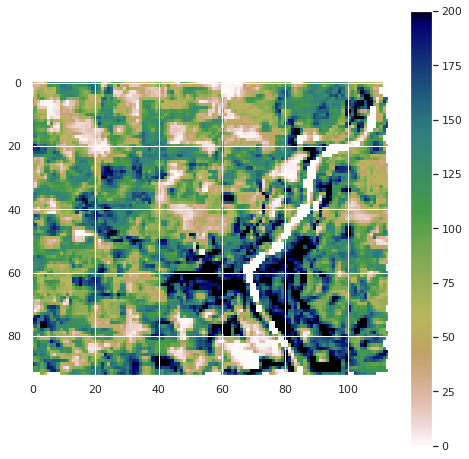

In [64]:
#plot the AGB
agb_file = "rs_data/lidar_biomass/agb_2019_reg_mask.tif"
da = xr.open_rasterio(agb_file)

fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(
    da.values[0,:,:],
    cmap="gist_earth_r",
    vmin=0,
    vmax=200,
)
cbar = ax.figure.colorbar(im, ax=ax)

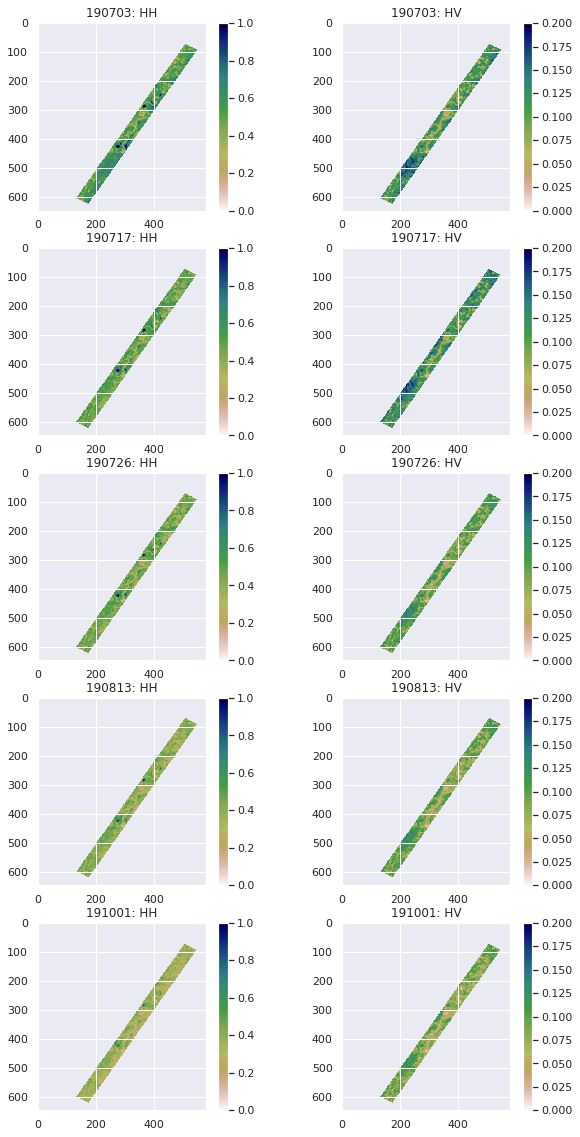

In [49]:
#plot the SAR data
sar_reg_list = pd.read_csv("rs_data/uavsar/sar_reg_list_leno.csv")['file_name'].tolist()
sar_reg_list = [f"rs_data/uavsar/{i}" for i in sar_reg_list]

num_scenes = 5
fig, ax = plt.subplots(num_scenes, 2, figsize=(10, 4 * num_scenes))
for i in range(num_scenes):
    hh_file = sar_reg_list[i*2 + 1]
    da_sar = xr.open_rasterio(hh_file)
    im = ax[i, 0].imshow(
        da_sar[0, :, :].values,
        cmap="gist_earth_r",
        vmin=0,
        vmax=1,
    )
    ax[i, 0].set_title(f"{os.path.basename(hh_file)[23:29]}: HH")
    cbar = ax[i, 0].figure.colorbar(im, ax=ax[i, 0])
    
    hv_file = sar_reg_list[i*2 + 0]
    da_sar = xr.open_rasterio(hv_file)
    im = ax[i, 1].imshow(
        da_sar[0, :, :].values,
        cmap="gist_earth_r",
        vmin=0,
        vmax=0.2,
    )
    ax[i, 1].set_title(f"{os.path.basename(hh_file)[23:29]}: HV")
    cbar = ax[i, 1].figure.colorbar(im, ax=ax[i, 1])

## Biomass retrieval (100m)



In [51]:
workingdir='/media/xeno/SAR/JPL/Forest_Scattering_Model/NISAR_Biomass/Data/leno'
os.chdir(workingdir)

Create the mask file with valid AGB pixels (0-100 Mg/ha) and HH/HV observations (backscatter > 0)

In [52]:
nlcd_file = 'ancillary_data/landcover/nlcd2016_leno_reg.tif'
glad_file = 'ancillary_data/landcover/glad_271_leno_reg.tif'

agb_file = 'rs_data/lidar_biomass/agb_2019_reg.tif'
ref_file = "rs_data/uavsar/NISARP_03112_100mref.tif"

sar_reg_list = pd.read_csv("rs_data/uavsar/sar_reg_list_leno.csv")['file_name'].tolist()
sar_reg_list = [f"rs_data/uavsar/{i}" for i in sar_reg_list]
da1_lst = []
for i in range(0, len(sar_reg_list), 2):
    da_tmp = xr.open_rasterio(sar_reg_list[i])
    da_tmp = xr.where((da_tmp>0.001) & (da_tmp<1), 1, 0)
    da1_lst.append(da_tmp)
da1 = xr.concat(da1_lst, dim="band").mean("band").expand_dims("band")

#AGB file
da0 = xr.open_rasterio(agb_file)
da0['y'] = da1.y.values
da0['x'] = da1.x.values

#Land Cover file, only keep the forest region
da_lc = xr.open_rasterio(lc_file)
mask_lc = (da_lc != 11) & (da_lc != 12) & (da_lc != 21) & (da_lc != 22) & (da_lc != 23) & (da_lc != 24) 

#GLAD file, mask out the forest loss after the year 2019
da_glad = xr.open_rasterio(glad_file)
mask_glad = (da_glad < 19)

#mask
da_mask = xr.where((da0>0) & (da0<250) & (da1==1) & mask_lc & mask_glad, 1, 0)

mask_file = "output/mask_agb_100m.tif"
mr.write_geotiff_with_gdalcopy(ref_file, da_mask.values, mask_file)

Overlapped region for NEON CHM and UAVSAR

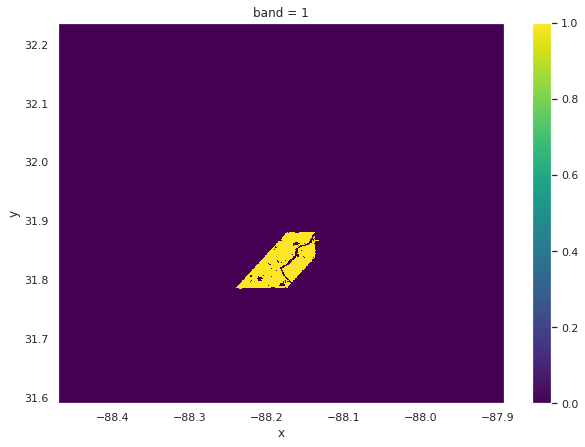

In [86]:
mask_file = 'output/mask_agb_100m.tif'
da = xr.open_rasterio(mask_file)
da.plot()

In [54]:
mask_file = 'output/mask_agb_100m.tif'
da = xr.open_rasterio(mask_file)

da_train = da.where(da.y>-100, 0) #split the training and testing dataset at the lattude of 31.81 degrees
train_file = 'output/mask_agb_100m_train.tif'
mr.write_geotiff_with_gdalcopy(mask_file, da_train.values, train_file)
# da_train.plot()

In [55]:
#randomly select the training samples
import random
random.seed(42)

# number of training samples
number_of_training_samples = 500


mask_train_file = 'output/mask_agb_100m_train.tif'
da_train_mask = xr.open_rasterio(mask_train_file)

train_indices = np.where(da_train_mask.values[0] > 0)
train_indices_index = random.sample(range(0,len(train_indices[0])), number_of_training_samples)

da_train =np.zeros_like(da_train_mask.values[0])

da_train[[train_indices[0][train_indices_index],
          train_indices[1][train_indices_index]]] = 1

train_file = 'output/mask_agb_100m_train_sampled.tif'
mr.write_geotiff_with_gdalcopy(mask_file, da_train.reshape((-1,da_train.shape[0], da_train.shape[1])), train_file)

da_train = xr.open_rasterio(train_file)
da_train.plot()

In [56]:
agb_file = "rs_data/lidar_biomass/agb_2019_reg.tif"
da = xr.open_rasterio(agb_file)

da_agb_train = da * da_train
da_agb_train.values[da_agb_train.values <= 0] = np.nan

da_agb_train.plot.hist()
plt.xlabel('AGB (Mg/ha)-Train')
plt.ylabel('Number of Samples')

Text(0, 0.5, 'Number of Samples')

In [57]:
mask_file = 'output/mask_agb_100m.tif'
da = xr.open_rasterio(mask_file)

da_test = da.where(da.y >= -100, 0) #testing dataset
test_file = 'output/mask_agb_100m_test.tif'
mr.write_geotiff_with_gdalcopy(mask_file, da_test.values, test_file)
# da_test.plot()

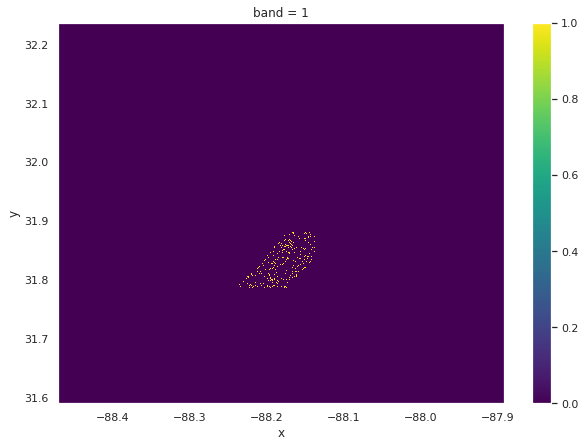

In [58]:
#randomly select the testing samples
import random
random.seed(42)

# number of training samples
number_of_testing_samples = 500


mask_test_file = 'output/mask_agb_100m_test.tif'
da_test_mask = xr.open_rasterio(mask_test_file)

#mask out the training samples to avoid the replicas between training and testing samples
da_test_mask.values[0][[train_indices[0][train_indices_index],
                        train_indices[1][train_indices_index]]] = 0
#
test_indices = np.where(da_test_mask.values[0] > 0)
test_indices_index = random.sample(range(0,len(test_indices[0])), number_of_testing_samples)

da_test =np.zeros_like(da_test_mask.values[0])

da_test[[test_indices[0][test_indices_index],
         test_indices[1][test_indices_index]]] = 1

test_file = 'output/mask_agb_100m_test_sampled.tif'
mr.write_geotiff_with_gdalcopy(mask_file, da_test.reshape((-1,da_test.shape[0], da_test.shape[1])), test_file)

da_test = xr.open_rasterio(test_file)
da_test.plot()

Text(0, 0.5, 'Number of Samples')

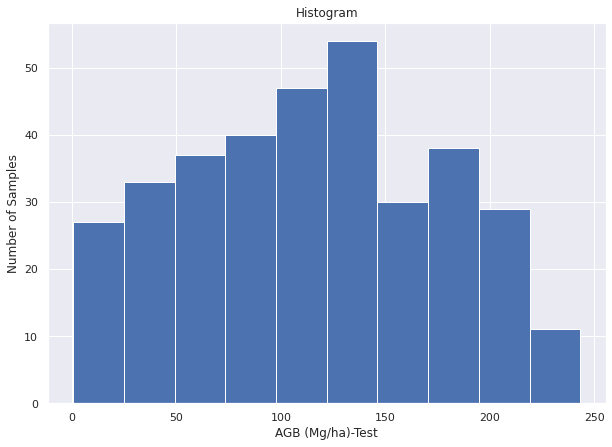

In [59]:
agb_file = "rs_data/lidar_biomass/agb_2019_reg.tif"
da = xr.open_rasterio(agb_file)

da_agb_test = da * da_test
da_agb_test.values[da_agb_test.values <= 0] = np.nan

da_agb_test.plot.hist()
plt.xlabel('AGB (Mg/ha)-Test')
plt.ylabel('Number of Samples')

**Noise Removal**

* Aim to find the best set of training data

* Removal procedure uses **mean backscatter** over time

* Threshold of noise can be set at absolute or relative AGB levels


* Input:
  * One mask map identifying valid pixels
  * One AGB map used for calibration
  * list of UAVSAR scenes
  * Absolute and relative noise levels
 
* Output:
  * Scatterplots showing radar backscatter vs. AGB

In [60]:
sar_reg_list = pd.read_csv("rs_data/uavsar/sar_reg_list_leno.csv")['file_name'].tolist()
sar_reg_list = [f"rs_data/uavsar/{i}" for i in sar_reg_list]
mr.scatter_plot_radar_agb('.', train_file, agb_file, sar_reg_list, "leno_sar_agb_v1")

In [61]:
mr.scatter_plot_radar_agb('.', test_file, agb_file, sar_reg_list, "leno_sar_agb_v1_test")

### Biomass retrieval Model 1. Universal approach (update W and S only)

Setup of the model.

1. Parameters $A$, $B$, $C'$, $D$, $\alpha$ and $\gamma$ (and $S_0$) are retrieved from calibration site

2. Initial values of AGB: $W_0 = (100 \times \sigma_{HV} )^2$

3. Update 1: Retrieval of $W_1$ from fixed parameters and $S_0$, with bounds of ±80% $W_0$

4. Update 2: Retrieval of $S_1$ from fixed parameters and $W_1$, with bounds of ±40% $S_0$

5. Update 3: Retrieval of $W_2$ from fixed parameters and $S_1$, with bounds of ±80% $W_1$

6. Retrieval is done by using local optimization – For each pixel, minimizing
    $$ Loss = \left[\omega_{HH} \left(f_{HH}(W) - \sigma_{HH, t} \right)\right]^2 + \left[\omega_{HV} \left(f_{HV}(W) - \sigma_{HV, t} \right)\right]^2 $$
   where $\omega_{HV}$ and $\omega_{HH}$ are the weights for HV and HH bands

7. For each scene, we have solutions of AGB: $\hat{W}_t$, the average solution is $\hat{W} = \sum_{t=1}^n \hat{W}_t$



* Input:
  * One LC map identifying valid pixels
  * One AGB map used for calibration
  * list of UAVSAR scenes
 
* Output:
  * Calibrated parameter file 
  * Model performance with incremental scenes
  

In [63]:
#parameters calibration
train_mask_file = "output/leno_sar_agb_v1_mask_ws0.tif"
test_mask_file = "output/leno_sar_agb_v1_test_mask_ws0.tif"

site_name = 'leno'
mr.scatter_plot_agb_retrieval0('.', train_mask_file, agb_file, sar_reg_list, f"{site_name}_leno_sar_agb_v1", test_mask=test_mask_file,
                               x_range=[0, 300],
                               x_txt="AGB (Mg/ha)",
                               param0_file = f"../{site_name}/output/leno_optimum_parameters.csv")

(1676, 1, 5, 2)
Scene 1 of 5
Scene 2 of 5
Scene 3 of 5
Scene 4 of 5
Scene 5 of 5
Dimension of W: (227, 5)
Scene 1 of 5
Scene 2 of 5
Scene 3 of 5
Scene 4 of 5
Scene 5 of 5
Dimension of W: (223, 5)


In [46]:
#calibrated parameters
param0_file = f"output/leno_optimum_parameters.csv"
params = pd.read_csv(param0_file, index_col=0)
params

A_HV      A_HH      B_HV     B_HH      C_HV      C_HH  alpha_HV  \
0  0.0001  0.008423  0.007984  0.05662  0.020651  0.772123  0.511343   

   alpha_HH  gamma_HV  gamma_HH    D_HV       D_HH         S  
0  0.843885  1.453173  1.214029  1.0001  10.185968  0.012221

**AGB Predictions** 

* Predict AGB using given parameter set 
* Inputs: 
    - mask file with non-zero values representing vegetation (pixels to be predicted)
    - list of UAVSAR backscatter files with the same dimension as the mask file
    - parameter file (can be derived from the previous section)
    - assigned output name
* outputs:
    - AGB prediction files in geotiff format
 

In [23]:
workingdir='/media/xeno/SAR/JPL/Forest_Scattering_Model/NISAR_Biomass/Data/leno'
os.chdir(workingdir)

In [24]:
sar_reg_list = pd.read_csv("rs_data/uavsar/sar_reg_list_leno.csv")['file_name'].tolist()
sar_reg_list = [f"rs_data/uavsar/{i}" for i in sar_reg_list]

agb_file = "rs_data/lidar_biomass/agb_2019_reg.tif"
ref_file = "rs_data/uavsar/NISARP_03112_100mref.tif"

da1 = xr.open_rasterio(ref_file)
da0 = xr.open_rasterio(agb_file)
da0['y'] = da1.y.values
da0['x'] = da1.x.values
da_mask = xr.where((da0>-1) & (da1>0), 1, 0)
mask_file = "output/mask_100m_pred.tif"
mr.write_geotiff_with_gdalcopy(ref_file, da_mask.values, mask_file)

Scene 1 of 5
Scene 2 of 5
Scene 3 of 5
Scene 4 of 5
Scene 5 of 5
Dimension of W: (35351, 5)
output/leno_sar_agb_v1scene_agb_predictions_mean.tif
output/leno_sar_agb_v1scene_agb_predictions_190703.tif
output/leno_sar_agb_v1scene_agb_predictions_190717.tif
output/leno_sar_agb_v1scene_agb_predictions_190726.tif
output/leno_sar_agb_v1scene_agb_predictions_190813.tif
output/leno_sar_agb_v1scene_agb_predictions_191001.tif


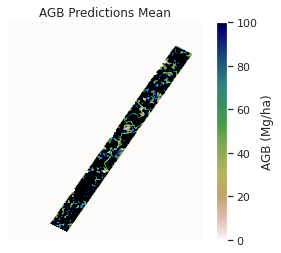

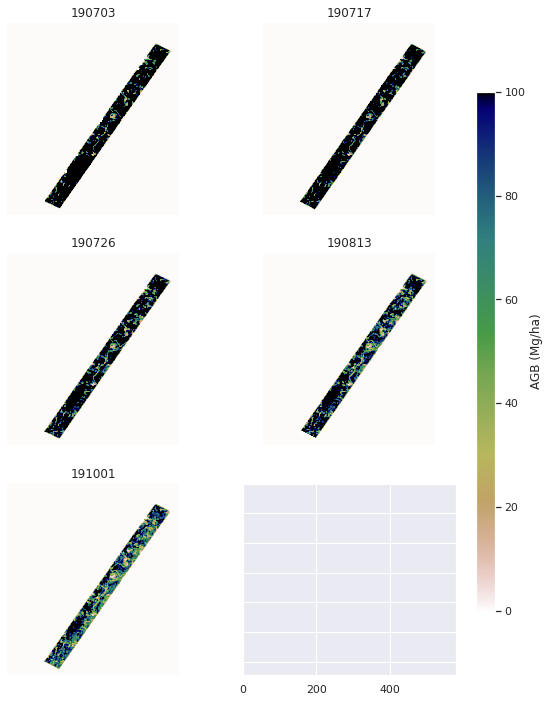

In [25]:
sar_reg_list = pd.read_csv("rs_data/uavsar/sar_reg_list_leno.csv")['file_name'].tolist()
sar_reg_list = [f"rs_data/uavsar/{i}" for i in sar_reg_list]

agb_file = "rs_data/lidar_biomass/agb_2019_reg.tif"
ref_file = "rs_data/uavsar/NISARP_03112_100mref.tif"

da1 = xr.open_rasterio(ref_file)
da0 = xr.open_rasterio(agb_file)
da0['y'] = da1.y.values
da0['x'] = da1.x.values
da_mask = xr.where((da1>0), 1, 0)
mask_file = "output/mask_100m_scene.tif"
mr.write_geotiff_with_gdalcopy(ref_file, da_mask.values, mask_file)

param_file = "output/leno_sar_agb_v1_model_sim_param0_s13.csv"
out_name = "output/leno_sar_agb_v1scene"
mr.colormap_plot_agb_prediction('.', sar_reg_list, mask_file, param_file, out_name, ab_range=[23, 29])